# Multiclass Text Classification - RNN - Embedding layer - GRU - Avant optimisation bayésienne

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import re
import os
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images')


X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

X = X
y = y

df = X.merge(y, right_index = True, left_index = True)

df.drop(["productid", "imageid"], axis = 1, inplace = True)
df.head()

C:\Users\barry\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\barry\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\barry\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


,designation,description,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2705


In [2]:
df['description'] = df['description'].str.replace(r'\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')

df['description']=df['description'].astype(str)

In [3]:
print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  989350
Nombre de mots - variable description :  6887832


On réunit tous les mots dans la colonne df.designation : 

In [4]:
df['designation2'] = df.designation +  " " + df.description 
df.designation = df['designation2']

# Text Pre-processing

To get an idea of what needs to be deleted :

In [5]:
def print_plot(index):
    example = df[df.index == index][['designation', 'prdtypecode']].values[0]
    example2 = df[df.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            
def print_plotbis(index):
    example = dfbis[dfbis.index == index][['designation', 'prdtypecode']].values[0]
    example2 = dfbis[dfbis.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])            

Text cleaning :

In [6]:
df['description'] = df['description'].str.replace('\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')

dfbis = df.copy()
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^\w +-_]')

STOPWORDS = set(stopwords.words('english'))
STOPWORDS2 = set(stopwords.words('french'))
STOPWORDS3 = set(stopwords.words('german'))
Mail = re.compile(r'\S*@\S*\s?')

letter = re.compile(r'\s+\w{1,2}\s+')
letter2 = re.compile(r'^(\w){1}\s+')
letter3 = re.compile(r'^(\w){2}\s+')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = Mail.sub(' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS2) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS3) # remove stopwors from text
    text = letter.sub('', text)
    text = letter2.sub('', text)
    text = letter3.sub('', text)
    return text
df['designation'] = df['designation'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  4997684
Nombre de mots - variable description :  4318930


In [7]:
for i in np.random.random_integers(0,df.shape[0], 4) :
    print(print_plotbis(i))
    print()
    print(print_plot(i))
    print()
    print()

prdtypecode: 2280
Luba Comics And Stories   nan
DESCRIPTION :  nan
None

prdtypecode: 2280
luba comics stories nan
DESCRIPTION :  nan
None


prdtypecode: 2522
Exacompta Papier À Couvrir Couleurs Assorties Pastel  Unité(S) nan
DESCRIPTION :  nan
None

prdtypecode: 2522
exacompta papier couvrir couleurs assorties pastel unité nan
DESCRIPTION :  nan
None


prdtypecode: 1160
Andre Schurrle  - Vfl Wolfsburg - Match Attax Topps / - Uefa Champions League nan
DESCRIPTION :  nan
None

prdtypecode: 1160
andre schurrle - vfl wolfsburg - match attax topps - uefa champions league nan
DESCRIPTION :  nan
None


prdtypecode: 1920
Géométrie Peinture Lin Coussin Coussin Case Canapé Home Décor B Pillow Case  Géométrie peinture lin Coussin Coussin Case Canapé Home Décor Caractéristiques: % tout neuf et de haute qualité Parfait pour place sur le canapé un café une bibliothèque un magasin de livres partie club. Matériau: Forme de lin: Place Taille: cm * cm /  « *  » Type: Taie d&#;oreiller S&#;il vous plaît

<ipython-input-7-95278cadca03>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 84916 + 1) instead
  for i in np.random.random_integers(0,df.shape[0], 4) :


## DATA TRANSFORMATION

In [8]:
# Que les # plus fréquents mots
MAX_NB_WORDS = 10000
# Tronque les observations à partir de # mots
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


tokenizer = text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df["designation"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 182078 unique tokens.


{'br': 1,
 'li': 2,
 'p': 3,
 'strong': 4,
 'nan': 5,
 'couleur': 6,
 'taille': 7,
 'cm': 8,
 'piscine': 9,
 'plus': 10,
 'peut': 11,
 'b': 12,
 'haute': 13,
 'eau': 14,
 'qualité': 15,
 'être': 16,
 'ul': 17,
 'dimensions': 18,
 'facile': 19,
 'matériel': 20,
 'tout': 21,
 'x': 22,
 'enfants': 23,
 'produit': 24,
 'sans': 25,
 'caractéristiques': 26,
 'bois': 27,
 'jeu': 28,
 'acier': 29,
 'm': 30,
 'plaît': 31,
 'comme': 32,
 'non': 33,
 'type': 34,
 'coussin': 35,
 'lumière': 36,
 'comprend': 37,
 'style': 38,
 'cette': 39,
 'oreiller': 40,
 'très': 41,
 'décoration': 42,
 'poids': 43,
 'led': 44,
 'taie': 45,
 'inclus': 46,
 'batterie': 47,
 'bébé': 48,
 'blanc': 49,
 'ans': 50,
 'main': 51,
 'protection': 52,
 'temps': 53,
 'sac': 54,
 'div': 55,
 'mode': 56,
 'raison': 57,
 'design': 58,
 'description': 59,
 'utiliser': 60,
 'hauteur': 61,
 'mesure': 62,
 'anti': 63,
 'maison': 64,
 'sol': 65,
 'contenu': 66,
 'neuf': 67,
 'amp': 68,
 'paquet': 69,
 'marque': 70,
 'pcs': 71,
 'po

In [9]:
X = tokenizer.texts_to_sequences(df["designation" ].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (84916, 250)


In [10]:
Y = pd.get_dummies(df['prdtypecode']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (84916, 27)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
#x_train, x_test, y_train, y_test = train_test_split(X,df.prdtypecode, test_size = 0.20, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(67932, 250) (67932, 27)
(16984, 250) (16984, 27)


## MODELISATION

In [12]:
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            factor=0.6,
                                            patience=2,
                                            verbose=1,
                                            mode='max',
                                            min_lr=1e-7)
early_stop = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         verbose=1,
                                         mode='max',
                                     min_delta=0.0001)
    
checkpoint = callbacks.ModelCheckpoint('textdl_26juin.h5',
                                           monitor='val_accuracy',
                                           verbose=1,
                                           save_weights_only=False,
                                           save_best_only=True,
                                           mode='max',
                                           save_freq='epoch')


C:\Users\barry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26], y=[12  8 19 ... 14 11  0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU,SpatialDropout1D, Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.25))
model.add(GRU(100))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, 
                              batch_size=batch_size,
                              validation_split=0.2,
                               class_weight = d_class_weights,
                              callbacks =  [lr_reduce, early_stop, checkpoint])
                            
## EVALUATION

Epoch 1/10
850/850 [==============================] - 345s 385ms/step - loss: 2.5971 - accuracy: 0.2610 - val_loss: 1.3670 - val_accuracy: 0.5801

Epoch 00001: val_accuracy improved from -inf to 0.58011, saving model to textdl_26juin.h5
Epoch 2/10
850/850 [==============================] - 352s 414ms/step - loss: 1.2918 - accuracy: 0.6424 - val_loss: 1.1071 - val_accuracy: 0.6754

Epoch 00002: val_accuracy improved from 0.58011 to 0.67543, saving model to textdl_26juin.h5
Epoch 3/10
850/850 [==============================] - 355s 418ms/step - loss: 0.9650 - accuracy: 0.7266 - val_loss: 0.9591 - val_accuracy: 0.7126

Epoch 00003: val_accuracy improved from 0.67543 to 0.71259, saving model to textdl_26juin.h5
Epoch 4/10
850/850 [==============================] - 455s 536ms/step - loss: 0.8137 - accuracy: 0.7654 - val_loss: 0.8670 - val_accuracy: 0.7393

Epoch 00004: val_accuracy improved from 0.71259 to 0.73931, saving model to textdl_26juin.h5
Epoch 5/10
850/850 [=======================

In [18]:
model.save("gru_simple.h5")

remarque c'est mieux avec du dropout sinon ça overfit plus

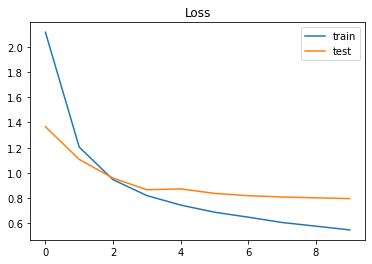

In [14]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

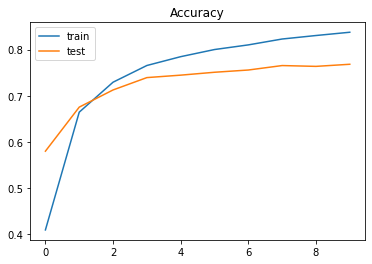

In [15]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test.argmax(axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.39      0.48      0.43       612
           1       0.56      0.59      0.57       521
           2       0.78      0.72      0.75       357
           3       0.77      0.90      0.83       161
           4       0.64      0.79      0.71       539
           5       0.84      0.82      0.83       786
           6       0.39      0.56      0.46       146
           7       0.68      0.54      0.60       961
           8       0.54      0.54      0.54       424
           9       0.85      0.87      0.86       974
          10       0.87      0.91      0.89       169
          11       0.72      0.78      0.75       507
          12       0.78      0.73      0.75       672
          13       0.84      0.80      0.82      1013
          14       0.91      0.91      0.91       841
          15       0.76      0.85      0.80       137
          16       0.80      0.77      0.79      1029
          17       0.73    